In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
import io
%cd "C:\Users\HP\Desktop\SHUBHANGI\MAJOR PROJECT"

C:\Users\HP\Desktop\SHUBHANGI\MAJOR PROJECT


In [25]:
df=pd.read_csv("FINAL DATA.csv")

In [26]:
df

,DATE,GDP,IMPORTS,EXPORTS,ECONOMIC GROWTH
0,30-06-2000,3852.54,1052.5440,851.0805,-0.970821
1,30-09-2000,3986.94,1046.7879,908.6415,-0.097240
2,31-12-2000,4152.55,1064.0562,902.8854,0.111344
3,31-03-2001,4269.13,994.9830,960.4464,1.975735
4,30-06-2001,4282.93,1050.8994,851.9028,-4.338040
...,...,...,...,...,...
86,31-12-2021,38507.72,13723.3647,8637.4392,-19.584957
87,31-03-2022,41123.60,13824.5076,9151.3767,-5.342438
88,30-06-2022,37479.08,15609.7209,9806.7498,-22.973405
89,30-09-2022,38809.88,15568.6059,8686.7772,-14.811006


In [27]:
df.shape

(91, 5)

In [28]:
df.columns

Index(['DATE', 'GDP', 'IMPORTS', 'EXPORTS', 'ECONOMIC GROWTH'], dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DATE             91 non-null     object 
 1   GDP              91 non-null     float64
 2   IMPORTS          91 non-null     float64
 3   EXPORTS          91 non-null     float64
 4   ECONOMIC GROWTH  91 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.7+ KB


In [30]:
df.describe()

,GDP,IMPORTS,EXPORTS,ECONOMIC GROWTH
count,91.000000,91.000000,91.000000,91.000000
mean,21879.270989,6767.050078,4531.469393,-7.591292
std,14039.703174,3877.288246,2429.238141,6.736098
min,3852.540000,994.983000,851.080500,-33.985067
25%,9040.915000,3089.381100,2227.199550,-11.088292
50%,18981.480000,7449.215700,5341.660800,-6.071837
75%,34401.675000,9879.934500,6431.208300,-3.243081
max,50147.710000,15609.720900,9806.749800,3.186930


In [31]:
import seaborn as sns

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


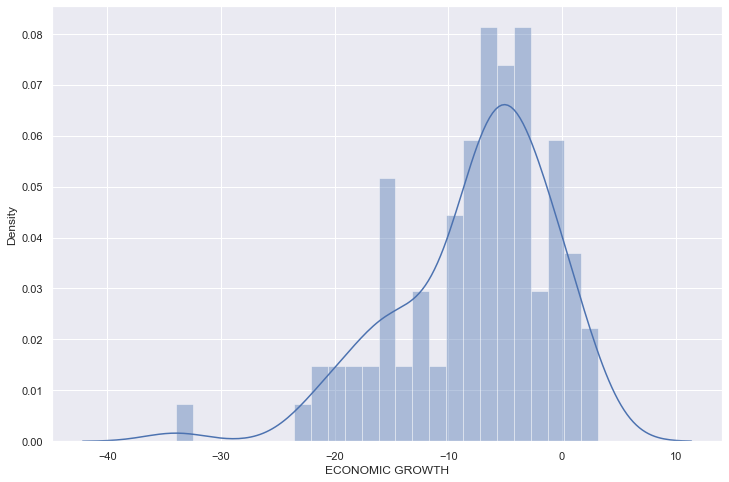

In [32]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(df["ECONOMIC GROWTH"],bins=25)
plt.show()

As shown in the picture above, the distribution of the economic growth is nearly normal. There are some outliers.



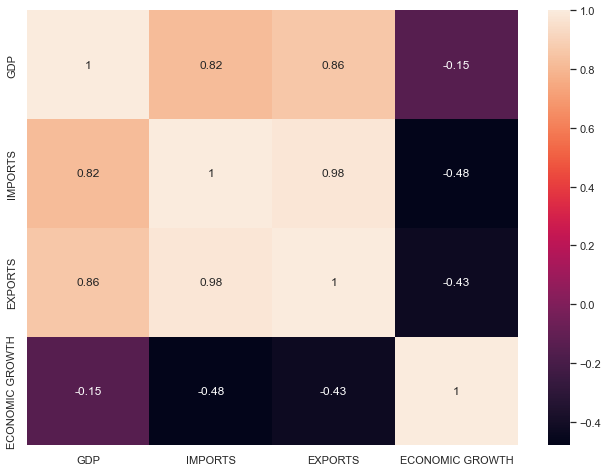

In [33]:
correlation_matrix = df.corr().round(2)
sns.set(rc={'figure.figsize':(11, 8)})
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

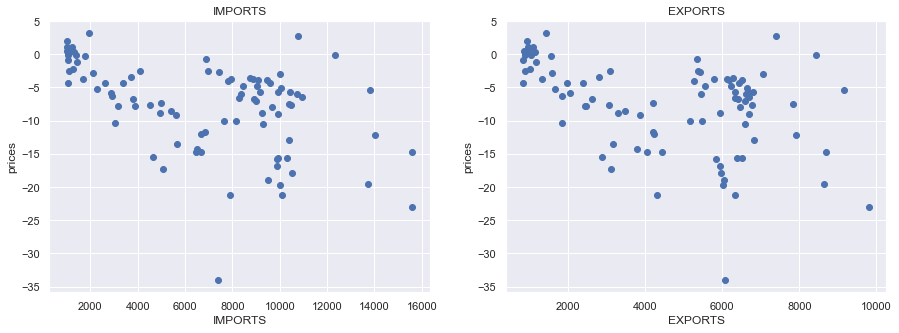

In [34]:
plt.figure(figsize=(15, 5))
features = ['IMPORTS', 'EXPORTS']
target = df['ECONOMIC GROWTH']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

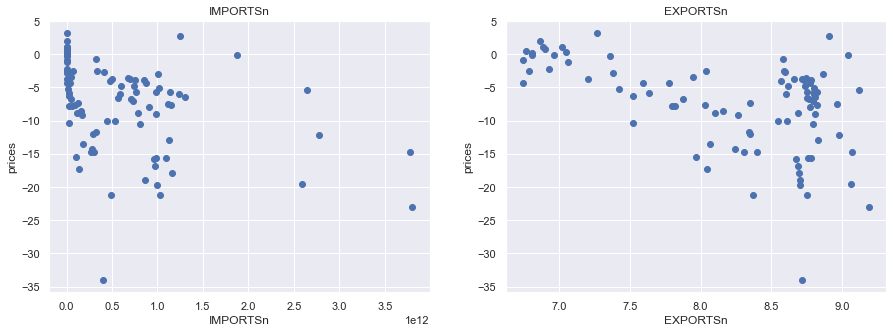

In [35]:
plt.figure(figsize=(15, 5))
df['IMPORTSn'] = df['IMPORTS']**3
df['EXPORTSn'] = np.log(df['EXPORTS'])
features = ['IMPORTSn', 'EXPORTSn']
target = df['ECONOMIC GROWTH']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')


In [36]:
import statsmodels.api as sm

# Define the dependant variable
y = df['ECONOMIC GROWTH']

# Define the independent variables
x = df[['IMPORTS', 'EXPORTS', 'GDP']]

# Add a constant term to the independent variables
x = sm.add_constant(x)

# Fit the multiple linear regression model
model = sm.OLS(y, x).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        ECONOMIC GROWTH   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     22.49
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           7.20e-11
Time:                        00:21:50   Log-Likelihood:                -276.08
No. Observations:                  91   AIC:                             560.2
Df Residuals:                      87   BIC:                             570.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0877      1.184     -2.607      0.0

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
